In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Assuming your CSV file is named 'nutrition_data.csv'
file_path = 'CLEANED_by_Food.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Get unique FF Food Descriptions
food_descriptions = df['FF Food description'].unique()




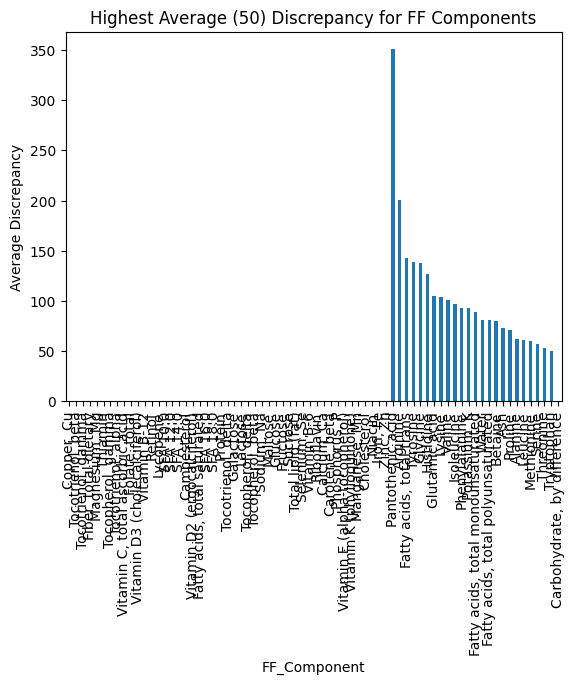

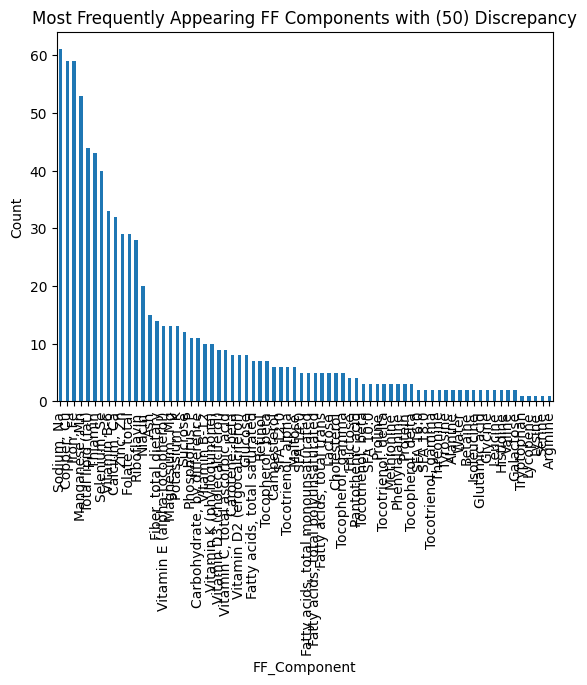

In [15]:
component_counts = {}

component_info = {}
percentage_threshold = 50

# Loop through each unique food description
for food_description in food_descriptions:
    # Filter rows for the specific food description
    food_df = df[df['FF Food description'] == food_description]

    # Calculate the absolute difference between SR Mean and FF Mean
    # Calculate the percentage difference between SR Mean and FF Mean relative to the lower value
    food_df['Percent_Diff'] = abs((food_df['SR Mean per 100g'] - food_df['FF Mean per 100g']) / food_df[['SR Mean per 100g', 'FF Mean per 100g']].min(axis=1) * 100)
    
    # Filter rows where the percentage difference is greater than the threshold
    filtered_df = food_df[food_df['Percent_Diff'] > percentage_threshold]
    
    # Check if there are any values left after filtering
    if not filtered_df.empty:
        # Count the occurrences of each FF_Component
        component_counts_for_food = filtered_df['FF_Component'].value_counts()

        # Calculate the average discrepancy for each FF_Component
        component_avg_diff = filtered_df.groupby('FF_Component')['Percent_Diff'].mean()

        # Update the overall dictionary with the counts
        for component, count in component_counts_for_food.items():
            component_counts[component] = component_counts.get(component, 0) + count

        # Update the overall dictionary with the average discrepancies
        for component, avg_diff in component_avg_diff.items():
            component_info[component] = component_info.get(component, []) + [avg_diff]

# Calculate the overall average discrepancy for each FF_Component
component_avg_info = {component: sum(avgs) / len(avgs) for component, avgs in component_info.items()}

# Convert the dictionaries to DataFrames for plotting
avg_diff_df = pd.DataFrame(list(component_avg_info.items()), columns=['FF_Component', 'Average_Discrepancy'])
counts_df = pd.DataFrame(list(component_counts.items()), columns=['FF_Component', 'Count'])

# Sort the DataFrames
avg_diff_df = avg_diff_df.sort_values(by='Average_Discrepancy', ascending=False)
counts_df = counts_df.sort_values(by='Count', ascending=False)

# Plot a bar graph of FF_Component average discrepancies
avg_diff_df.plot(kind='bar', x='FF_Component', y='Average_Discrepancy', legend=False)
plt.title(f'Highest Average ({percentage_threshold}) Discrepancy for FF Components')
plt.xlabel('FF_Component')
plt.ylabel('Average Discrepancy')
plt.show()

# Plot a bar graph of FF_Component counts
counts_df.plot(kind='bar', x='FF_Component', y='Count', legend=False)
plt.title(f'Most Frequently Appearing FF Components with ({percentage_threshold}) Discrepancy')
plt.xlabel('FF_Component')
plt.ylabel('Count')
plt.show()